<h1>Indholdsfortegnelse<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot, os, dill
import minepy as mp

In [4]:
# Load Data
data_path = "../Data/data15_13TeV.00267358.physics_MinBias.30062015_v0_per_0.root"
data_file = uproot.open(data_path)
data_tree = data_file['tree']

# load_variables = "v0_rxy v0_chi2 cosTheta v0_ks_mass v0_rxyErr pT ntrk_pv0 a0 calpha a0xy pv0_y".split(" ")
load_variables = data_tree.keys()[:57]
load_variables.remove(b"npv")

df = data_tree.pandas.df(load_variables, entrystop = 10**3)


In [5]:
# define probability variable
model_path = "models/data_trained_xg.dat"

func_seri = dill.load(open(model_path, 'rb'))
prob_func = dill.loads(func_seri)

In [6]:

df = prob_func(df)

<string>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
import pickle
update_mic_matrix = False

if update_mic_matrix:
    import minepy
    result = np.pstats(df.T)
    pickle.dump((col, result), open("resources/mic_matrix.dat", 'wb'))
else:
    col, result = pickle.load(open("resources/mic_matrix.dat", 'rb'))

In [20]:
result[0].shape

(1596,)

In [21]:
from scipy.spatial.distance import squareform

mat = squareform(result[0])

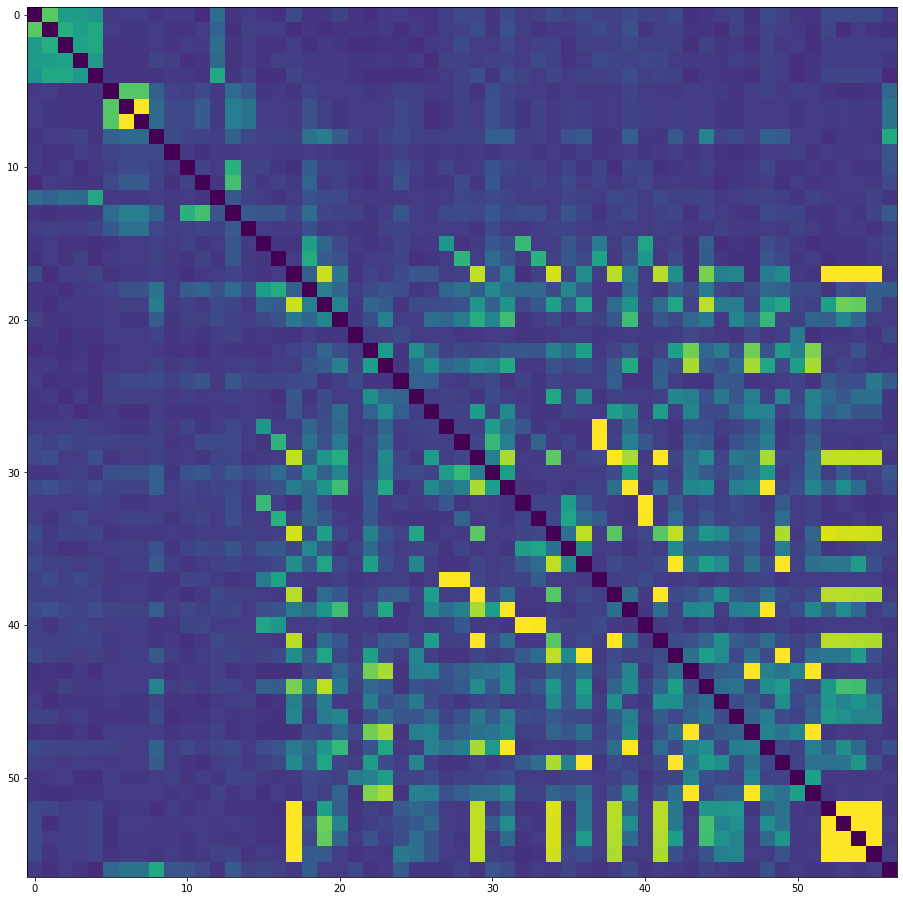

In [22]:
fig, ax = plt.subplots(figsize = (18, 16))
show = ax.imshow(mat) 
cols = df.columns

# for i in range(len(cols)):
#     for j in range(len(cols)):
#         text = ax.text(j, i, np.round(mat[i, j], 2),
#                        ha="center", va="center", color="w")

In [ ]:
ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(cols, rotation = 90)
ax.set_yticks(np.arange(len(cols)))
ax.set_yticklabels(cols)
ax.tick_params(axis = 'x', bottom = False, top = True, labelbottom = False, labeltop = True)
# ax.xticks(rotation = 90)

fig.colorbar(show)

fig.tight_layout()
fig

In [ ]:
from scipy.cluster.hierarchy import linkage, leaves_list, optimal_leaf_ordering
from scipy.spatial.distance import squareform

dist = squareform(mat)
dist = np.exp(- dist)

Z = linkage(dist, optimal_ordering = True, method = "average")
sort_ind = leaves_list(optimal_leaf_ordering(Z, dist))

# leaves_list(linkage(dist, optimal_ordering = True))

In [ ]:
last = ["v0_ks_mass", "prob"]

ind_last = sort_ind[np.array([list(cols).index(par) for par in last])]

sort_ind = np.append(sort_ind, sort_ind[ind_last])

sort_ind = np.delete(sort_ind, ind_last)

sorted_mat = np.zeros_like(mat)

for i_old, i_new in enumerate(sort_ind):
    for j_old, j_new in enumerate(sort_ind):
        sorted_mat[i_new, j_new] = mat[i_old, j_old]


In [ ]:
fig, ax = plt.subplots(figsize = (18, 16))
show = ax.imshow(sorted_mat)


In [ ]:
ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(cols[sort_ind], rotation = 90)
ax.set_yticks(np.arange(len(cols)))
ax.set_yticklabels(cols[sort_ind])
ax.tick_params(axis = 'x', bottom = False, top = True, labelbottom = False, labeltop = True)
# ax.xticks(rotation = 90)

fig.colorbar(show)

fig.tight_layout()
fig